# Analysis of Howell's data with pandas

In [2]:
import numpy as np
import matplotlib.pyplot as plt # type: ignore

In [3]:
import pandas as pd             # type: ignore
import math

Partial census data for !Kung San people (Africa), collected by Nancy Howell (~ 1960), csv from R. McElreath, "Statistical Rethinking", 2020.

In [4]:
howell = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';', dtype={'male': bool})

In [5]:
howell.head()

,height,weight,age,male
0,151.765,47.825606,63.0,True
1,139.700,36.485807,63.0,False
2,136.525,31.864838,65.0,False
3,156.845,53.041914,41.0,True
4,145.415,41.276872,51.0,False


In [6]:
howell.describe(percentiles=[0.05, 0.95])

,height,weight,age
count,544.000000,544.000000,544.000000
mean,138.263596,35.610618,29.344393
std,27.602448,14.719178,20.746888
min,53.975000,4.252425,0.000000
5%,77.025500,9.165393,1.000000
50%,148.590000,40.057844,27.000000
95%,165.735000,54.818011,67.000000
max,179.070000,62.992589,88.000000


## Exercise 1

Describe data for young people (less than 18 years old).

In [7]:
youth = howell[howell['age'] < 18]
adult = howell[howell['age'] >= 18]
howell[howell['age'] < 18].describe(percentiles=[0.05, 0.95])
howell[howell['age'] >= 18].describe(percentiles=[0.05, 0.95])

,height,weight,age
count,352.000000,352.000000,352.000000
mean,154.597093,44.990486,41.138494
std,7.742332,6.456708,15.967855
min,136.525000,31.071052,18.000000
5%,142.875000,34.831613,20.000000
50%,154.305000,44.792210,39.000000
95%,167.005000,55.971835,71.450000
max,179.070000,62.992589,88.000000


## Exercise 2

Plot together the two distributions of height for young and not young (let's say "adult") people.

(array([ 8., 32., 62., 60., 65., 65., 35., 18.,  6.,  1.]),
 array([136.525 , 140.7795, 145.034 , 149.2885, 153.543 , 157.7975,
        162.052 , 166.3065, 170.561 , 174.8155, 179.07  ]),
 <BarContainer object of 10 artists>)

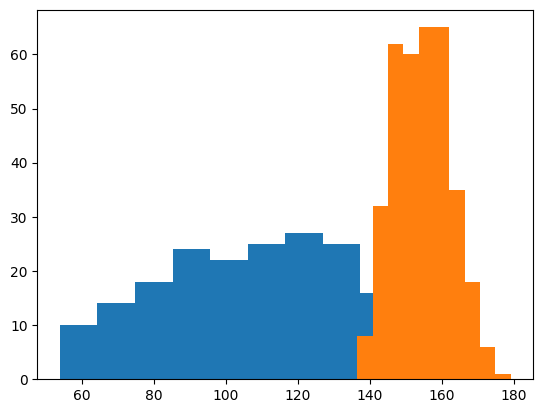

In [8]:
fig, ax = plt.subplots()
ax.hist(youth['height'])
ax.hist(adult['height'])

## Exercise 3

Plot together the two distributions of height for adult males and adult females.

<AxesSubplot: >

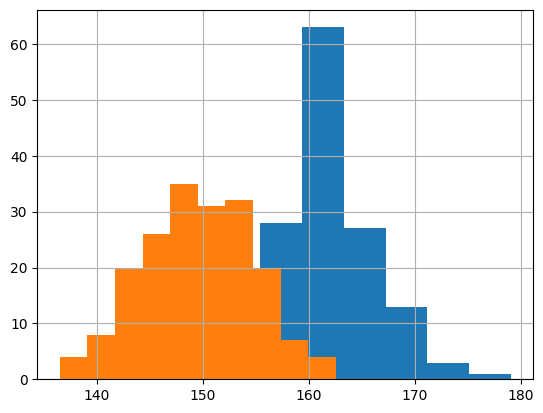

In [9]:
adult[adult['male'] == True]['height'].hist()
adult[adult['male'] == False]['height'].hist()

# Exercise 4

Compare the distribution of height in adult people with a Gaussian with the same mean and standard deviation. For this exercise it is useful to define a function the computes the Gaussian function:


$g(x) =  \frac{1}{\sqrt{2\cdot\pi\cdot\sigma^2}}\cdot e^{-\frac{(x - \mu)^2}{2\cdot\sigma^2}}$


In [21]:
def gaussian(x: np.ndarray, mu: float, sigma: float) -> np.ndarray:
    return (1/(2*np.pi*sigma**2)**.5)*np.exp(-(x - mu)**2/(2*sigma**2))
adults = howell[howell['age']>=18]
adult.describe()

,height,weight,age
count,352.000000,352.000000,352.000000
mean,154.597093,44.990486,41.138494
std,7.742332,6.456708,15.967855
min,136.525000,31.071052,18.000000
25%,148.590000,40.256290,28.000000
50%,154.305000,44.792210,39.000000
75%,160.655000,49.292693,51.000000
max,179.070000,62.992589,88.000000


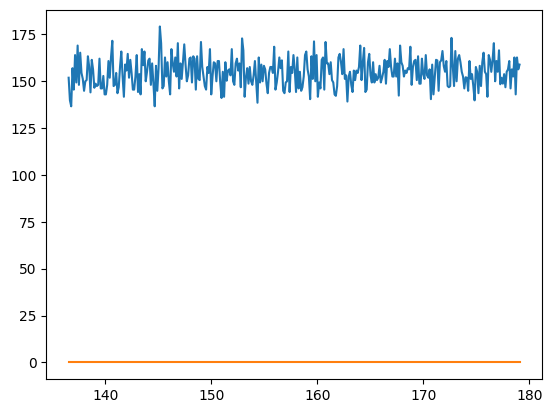

In [30]:
fig, ax= plt.subplots()
x = adults['height'].values.tolist()
y = np.linspace(136.525000,179.070000,352)
plt.plot(y, x)
plt.plot(y, Gaussian(y,154.597093,7.742332))
plt.show()

## Exercise 5

Compare the distribution of height in adult people with a sample of the same size of values randomly sampled from a Gaussian distribution with the same mean and standard deviation.

(Hint: have a look of the documentation for `np.random.normal`)


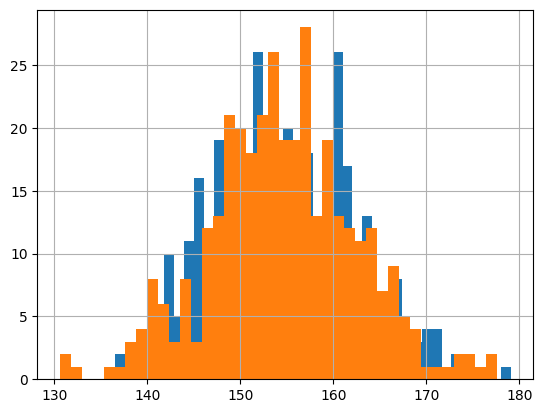

In [43]:
adult['height']
b = np.random.normal(154.597093,7.742332,352)
a = np.linspace(130,190,352)
_ = adult['height'].hist(bins = 40)
__ =plt.hist(b,bins = 40)

## Exercise 6

The Gaussian distribution is called *normal* because it emerges in many natural phenomena. Random values added together generate a normal distribution: the generating
distribution doesn't really matter (can change the speed of convergence).

Sample 20 values from a uniform distribution between -1 and 1 and sum them together. Make a `np.ndarray` with 1000 replicas of this procedure and plot the distribution of the results. Compare it with a Gaussian with the same mean and standard deviation.



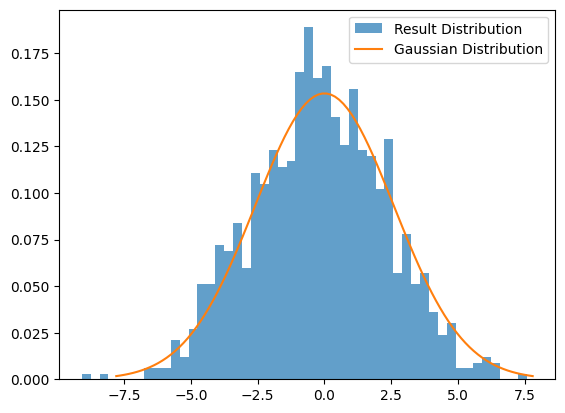

In [57]:
sums=np.zeros(1000)
for i in range(1000):
    value = np.random.uniform(-1,1,20)
    sums[i]=value.sum()
_ = plt.hist(sums, bins=50, density=True, alpha=0.7, label="Result Distribution")

mean = 0
std = 2.6
x = np.linspace(mean - 3*std, mean + 3*std, 100)
y = np.exp(-0.5 * ((x - mean) / std)**2) / (np.sqrt(2 * np.pi) * std)
plt.plot(x, y, label="Gaussian Distribution")
plt.legend()

## Exercise 7

Almost the same thing happens with multiplication of *small* numbers.

For example: $1.1\times1.1 = (1 + 0.1)(1 + 0.1) = 1 + 0.2 + 0.01 \approx 1.2$

Multiply small numbers is not that different from summing them, thus we get
again a normal distribution.

Sample 20 values from a uniform distribution between -1.1 and 1.1 and multiply them together. Make a `np.ndarray` with 1000 replicas of this procedure and plot the distribution of the results. Compare it with a Gaussian with the same mean and standard deviation.


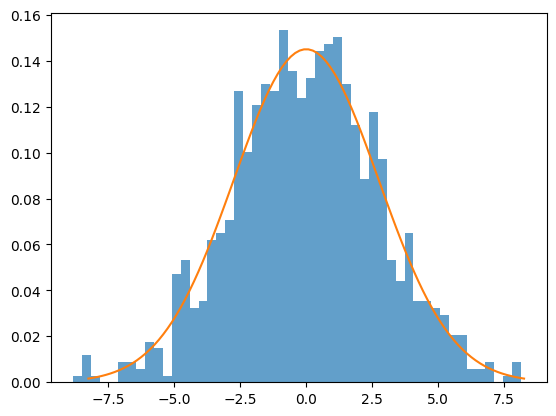

In [64]:
sums=np.zeros(1000)
for i in range(1000):
    values=np.random.uniform(-1.1,1.1,20)
    sums[i]=values.sum()
mean = sums.mean()
std = sums.std()
plt.hist(sums,bins=50,alpha=0.7,density=True)
x=np.linspace(mean-3*std,mean+3*std,100)
y=np.exp(-0.5 * ((x - mean) / std)**2) / (np.sqrt(2 * np.pi) * std)
plt.plot(x,y)
plt.show()

## Exercise 8

Plot height vs weight in adult people


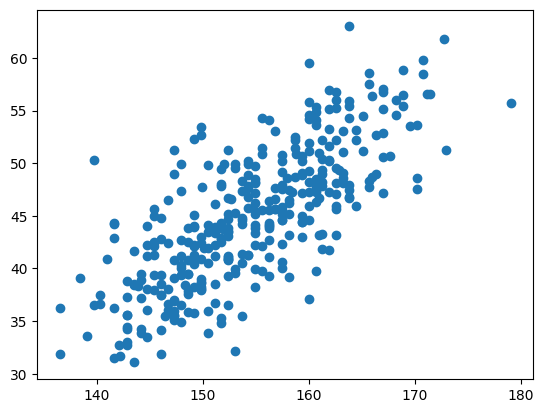

In [72]:
plt.scatter(adult['height'],adult['weight'])

## Exercise 9

Add a bmi (Body Mass Index) column to the `howell` dataframe. BMI is the weight (in kg) divided by the square of height (in m).


In [76]:
howell['BMI']=howell['weight']/(howell['height']/100)**2
howell

,height,weight,age,male,BMI
0,151.765,47.825606,63.0,True,20.764297
1,139.700,36.485807,63.0,False,18.695244
2,136.525,31.864838,65.0,False,17.095718
3,156.845,53.041914,41.0,True,21.561444
4,145.415,41.276872,51.0,False,19.520384
...,...,...,...,...,...
539,145.415,31.127751,17.0,True,14.720729
540,162.560,52.163080,31.0,True,19.739486
541,156.210,54.062497,21.0,False,22.155341
542,71.120,8.051258,0.0,True,15.917698


## Exercise 10

Look at the documentation for `pandas.plotting.scatter_matrix` and use that function for visualising the correlations between height, weight, age, BMI.



array([[<AxesSubplot: xlabel='height', ylabel='height'>,
        <AxesSubplot: xlabel='weight', ylabel='height'>,
        <AxesSubplot: xlabel='age', ylabel='height'>,
        <AxesSubplot: xlabel='BMI', ylabel='height'>],
       [<AxesSubplot: xlabel='height', ylabel='weight'>,
        <AxesSubplot: xlabel='weight', ylabel='weight'>,
        <AxesSubplot: xlabel='age', ylabel='weight'>,
        <AxesSubplot: xlabel='BMI', ylabel='weight'>],
       [<AxesSubplot: xlabel='height', ylabel='age'>,
        <AxesSubplot: xlabel='weight', ylabel='age'>,
        <AxesSubplot: xlabel='age', ylabel='age'>,
        <AxesSubplot: xlabel='BMI', ylabel='age'>],
       [<AxesSubplot: xlabel='height', ylabel='BMI'>,
        <AxesSubplot: xlabel='weight', ylabel='BMI'>,
        <AxesSubplot: xlabel='age', ylabel='BMI'>,
        <AxesSubplot: xlabel='BMI', ylabel='BMI'>]], dtype=object)

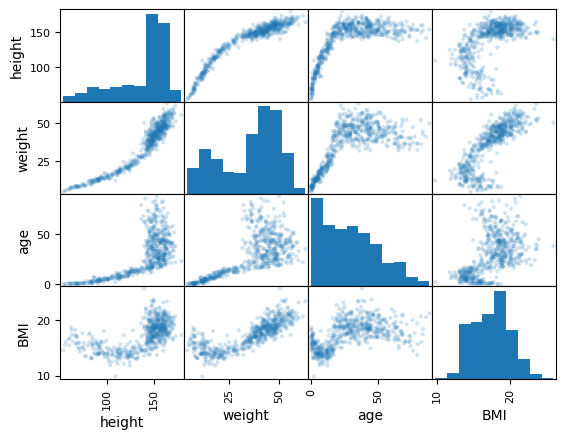

In [84]:
pd.plotting.scatter_matrix(howell[['height','weight','age','BMI']],alpha=0.2)